## Overview

This is the structure of this file:

0. Packages & Importing
1. Explorative Data Analysis and Data Cleaning
2. Preprocessing
3. Running the Model (select one to run so plotting works)
4. Plotting the Results
5. Model Diagnostics


## 0. Packages & Importing

In [4]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics import jaccard_score, fowlkes_mallows_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D


# Loading the dataset
filepath = "data_clustering.xlsx"
df_original = pd.read_excel(filepath)



## 1. Explorative Data Analysis and Data Cleaning

Nullvalues of columns:
ID             0
Credit         0
Sex            0
Education      0
Status         0
Age            0
Repayment 6    0
Repayment 5    0
Repayment 4    0
Repayment 3    0
Repayment 2    0
Repayment 1    0
Amount 6       0
Amount 5       0
Amount 4       0
Amount 3       0
Amount 2       0
Amount 1       0
Previous 6     0
Previous 5     0
 Previous 4    0
Previous 3     0
Previous 2     0
Previous 1     0
dtype: int64
Datatypes of columns:
Column 'ID ' has data type: int64
Column 'Credit' has data type: int64
Column 'Sex' has data type: int64
Column 'Education' has data type: int64
Column 'Status' has data type: int64
Column 'Age' has data type: int64
Column 'Repayment 6' has data type: int64
Column 'Repayment 5' has data type: int64
Column 'Repayment 4' has data type: int64
Column 'Repayment 3' has data type: int64
Column 'Repayment 2' has data type: int64
Column 'Repayment 1' has data type: int64
Column 'Amount 6' has data type: int64
Column 'Amount 5' has data 

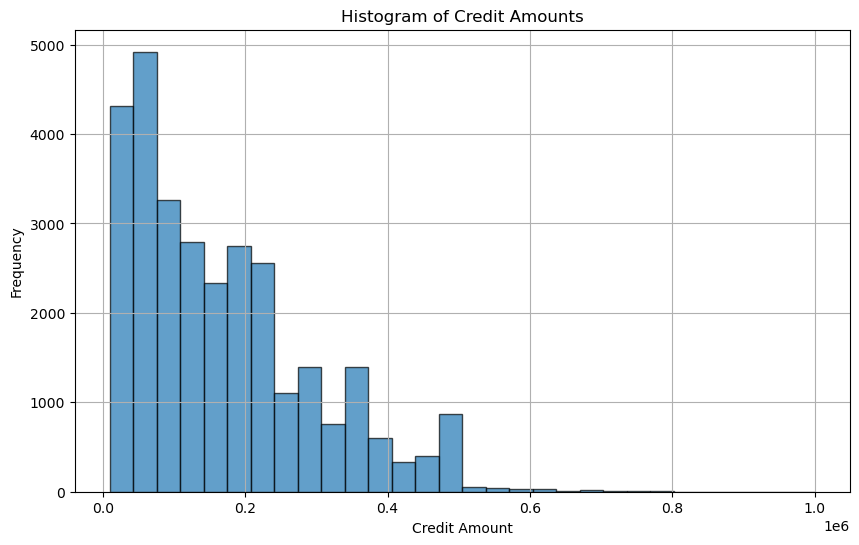

No negative values found in the 'Credit' column.


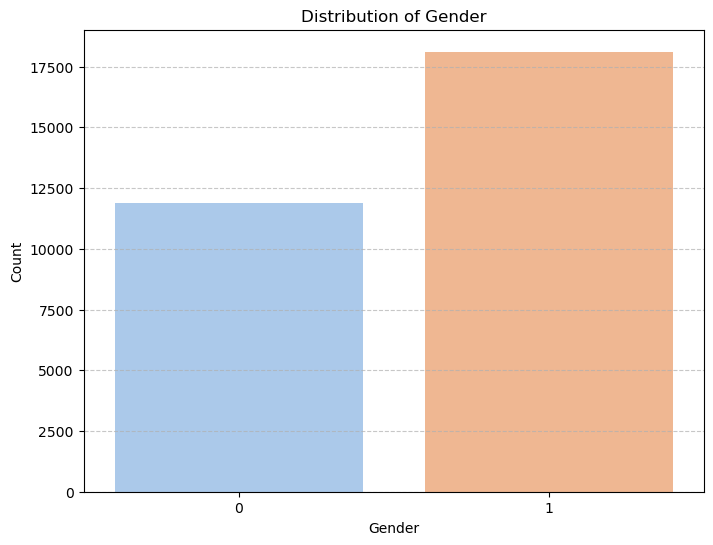

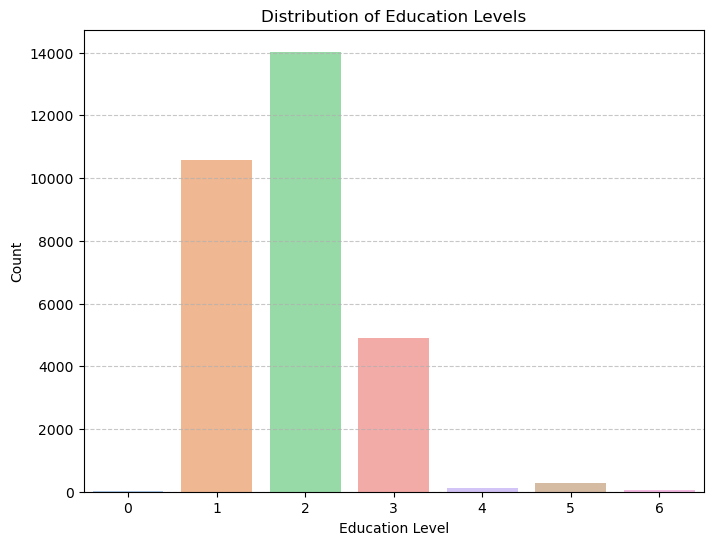

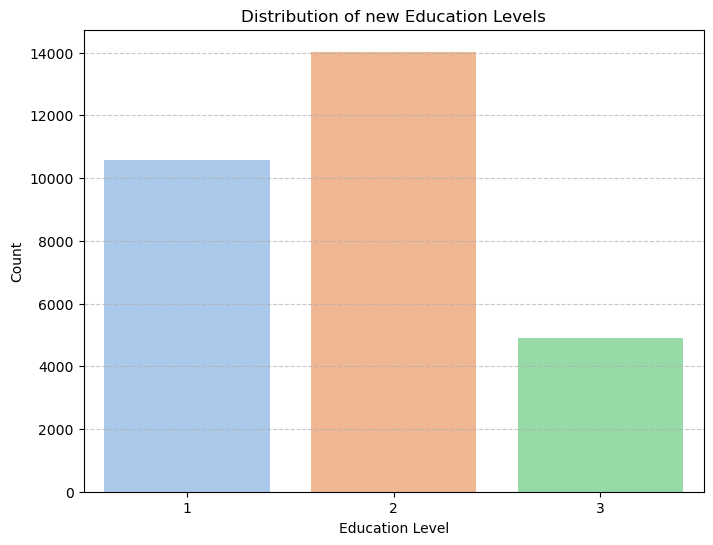

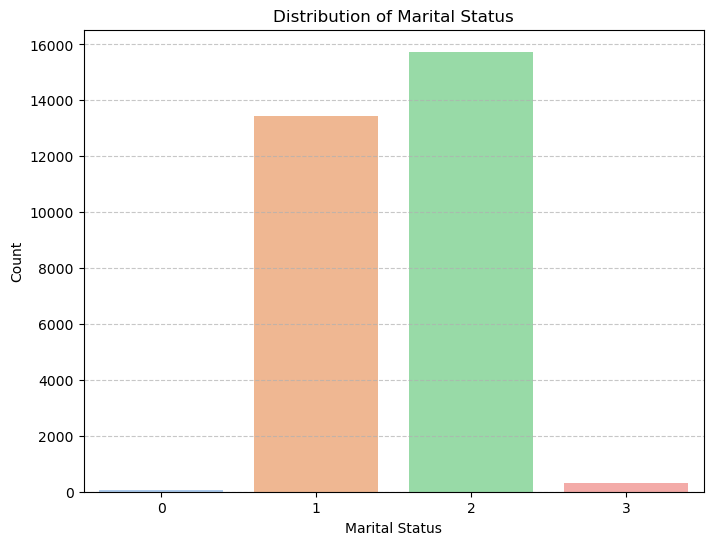

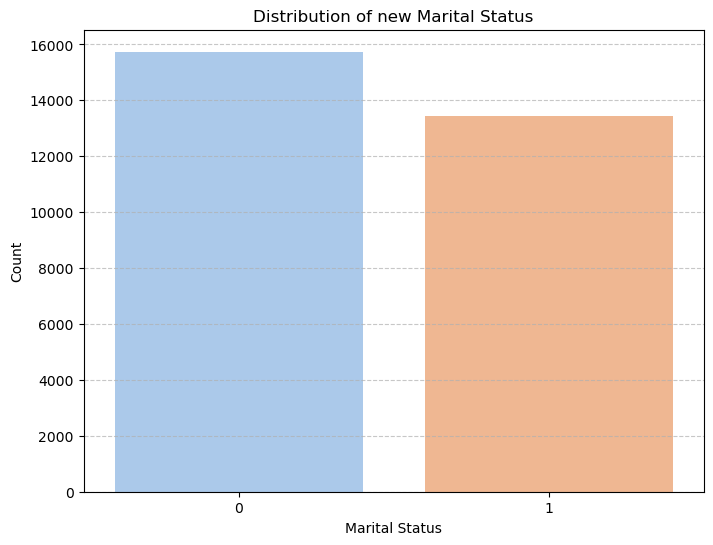

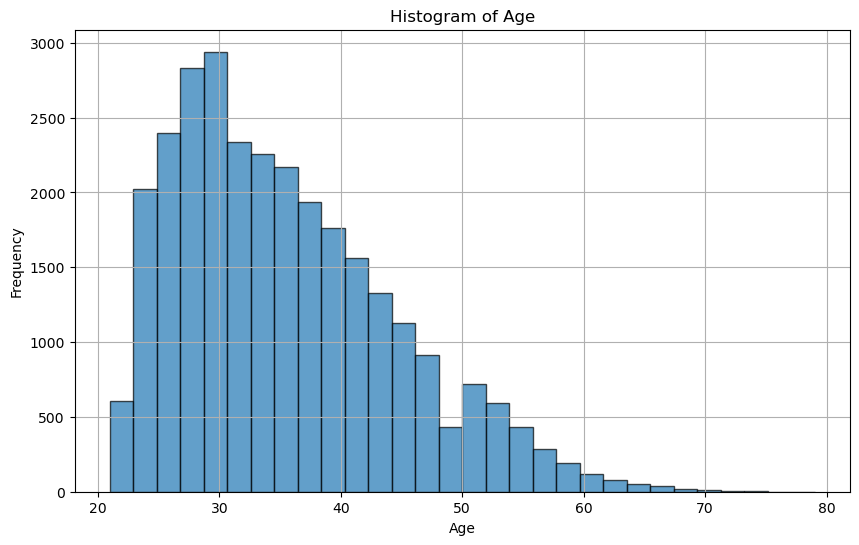

No negative values found in the 'Age' column.
The 5 highest values in the 'Age' column are:
18245    79
246      75
25136    75
25141    75
29175    74
Name: Age, dtype: int64


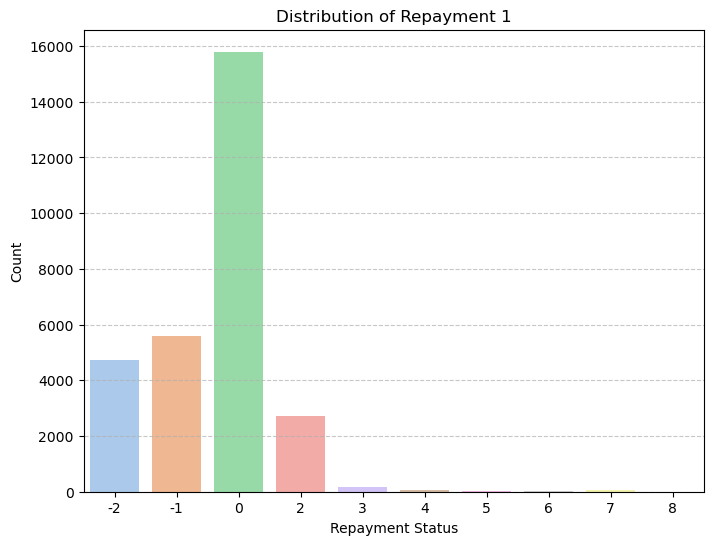

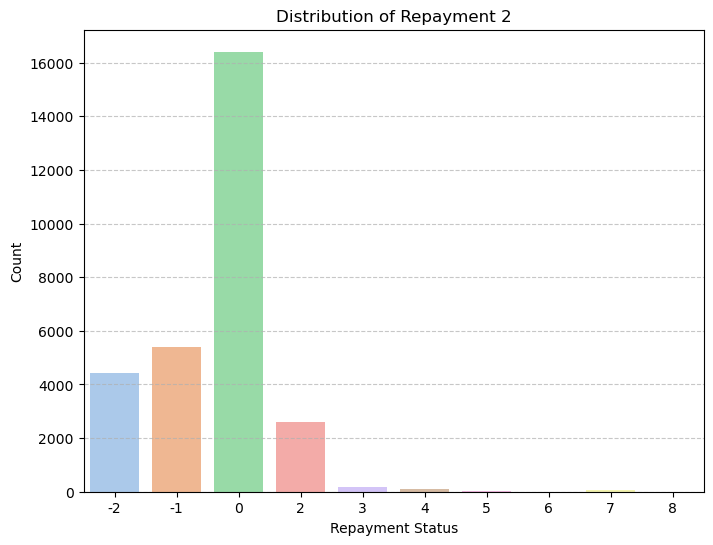

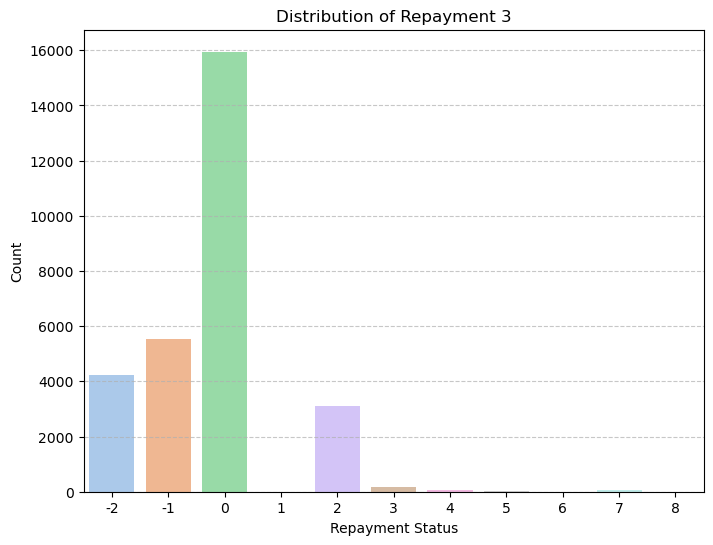

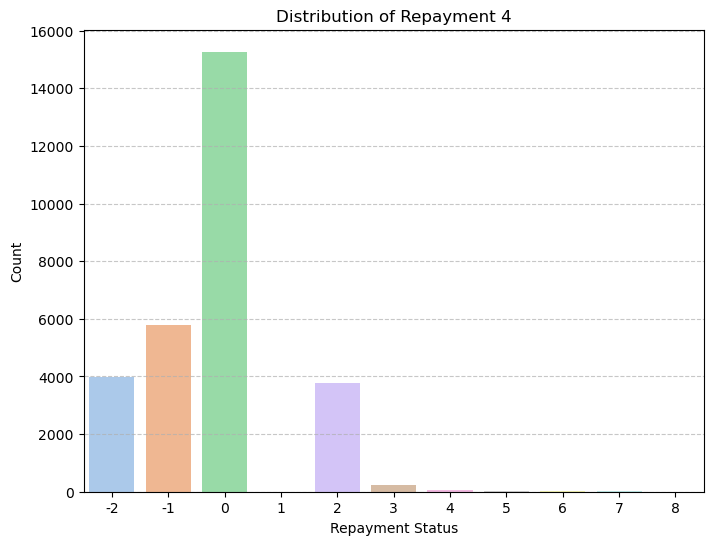

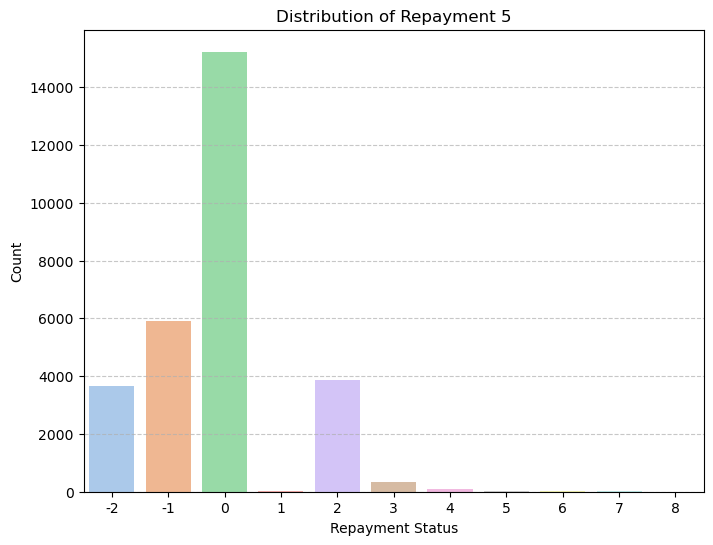

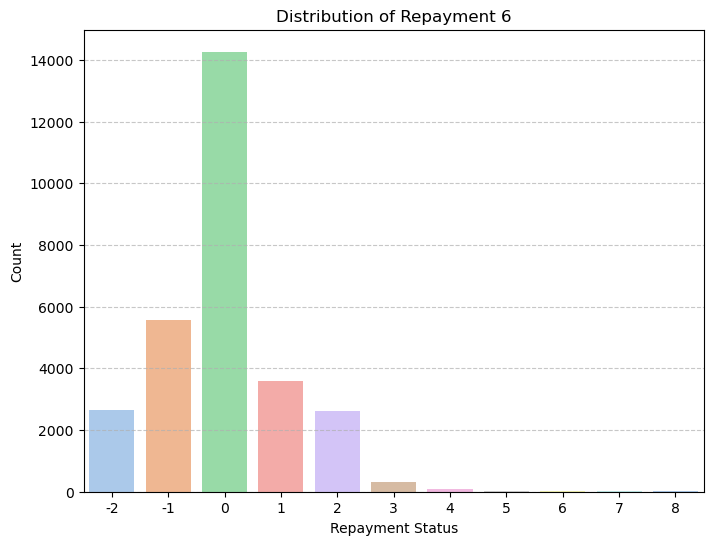

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:128: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


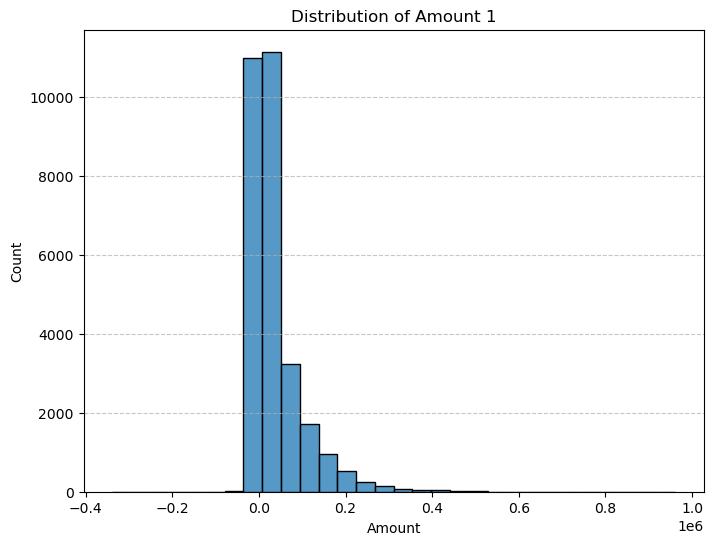

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:128: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


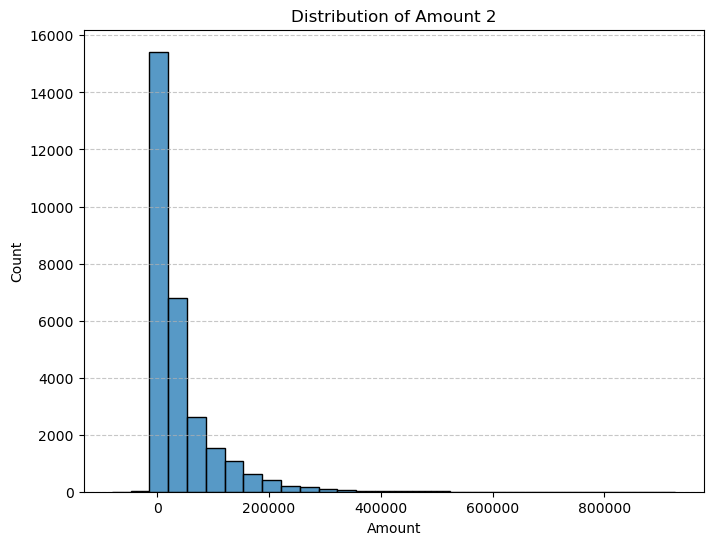

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:128: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


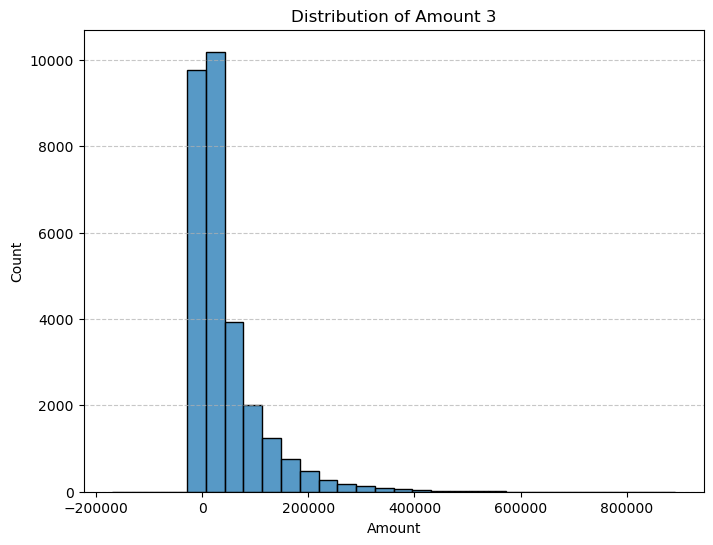

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:128: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


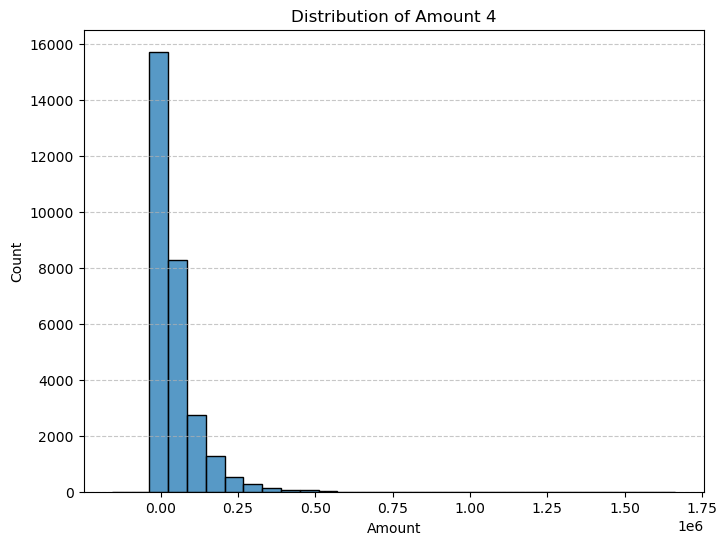

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:128: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


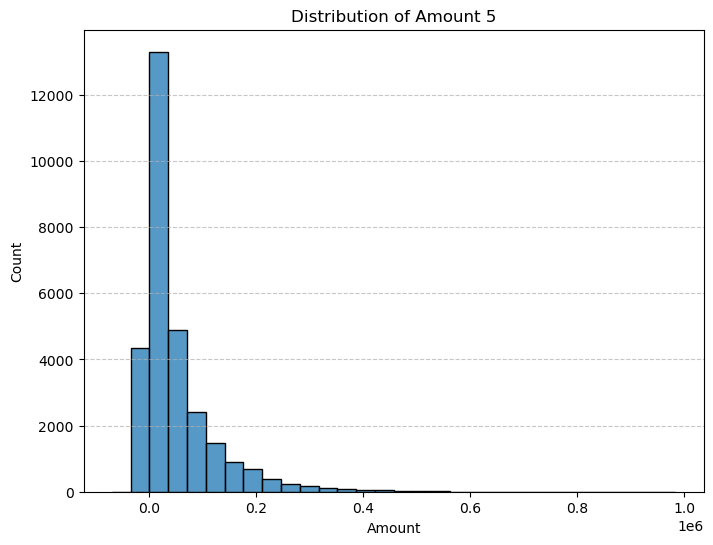

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:128: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


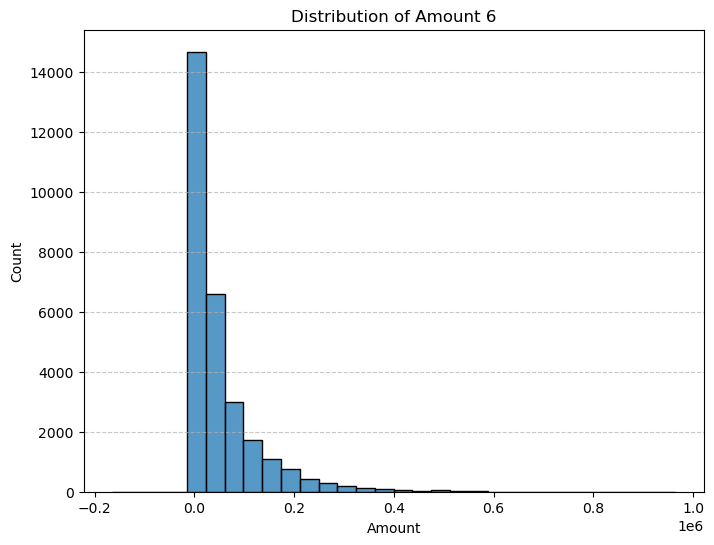

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


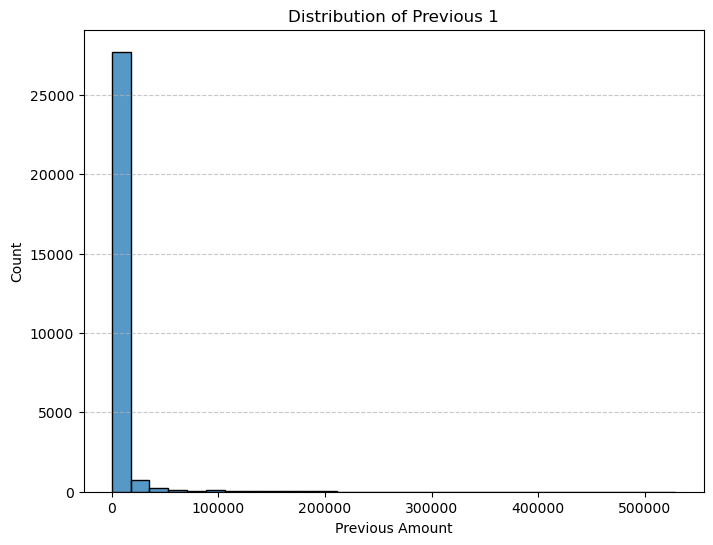

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


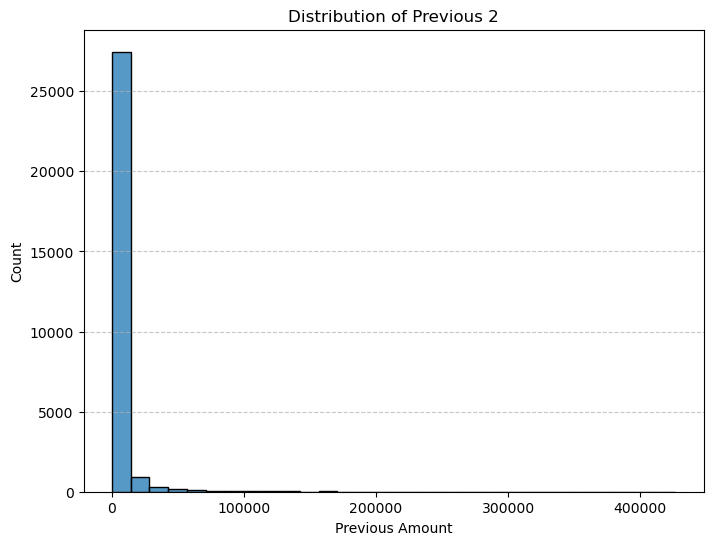

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


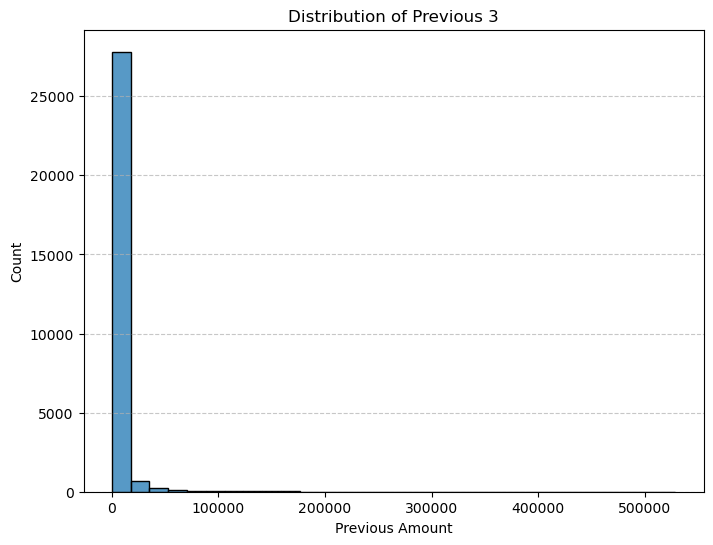

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


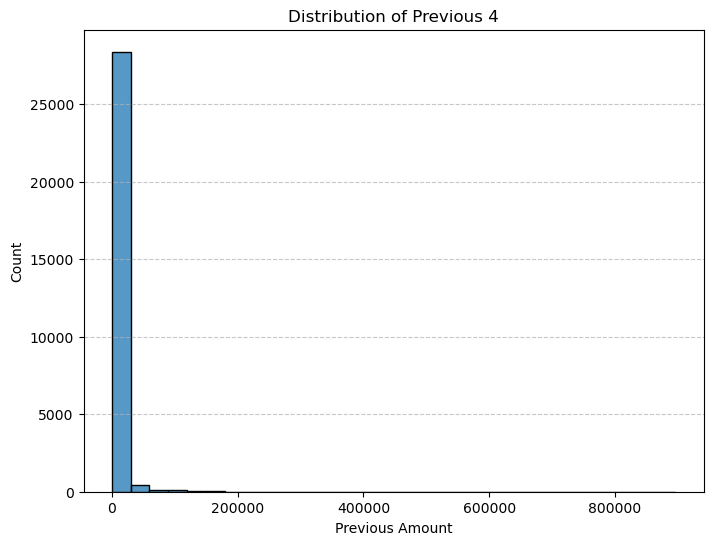

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


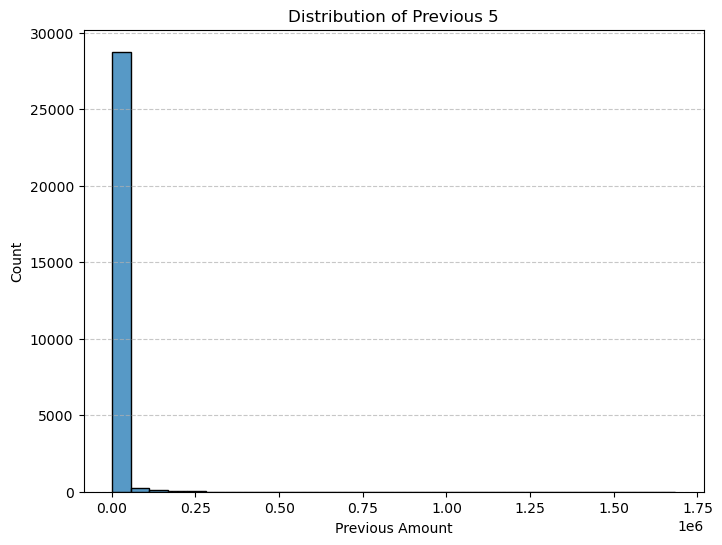

/var/folders/_x/mvbxnn2n229chfd7cwh2rgs80000gn/T/ipykernel_14002/713665262.py:140: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


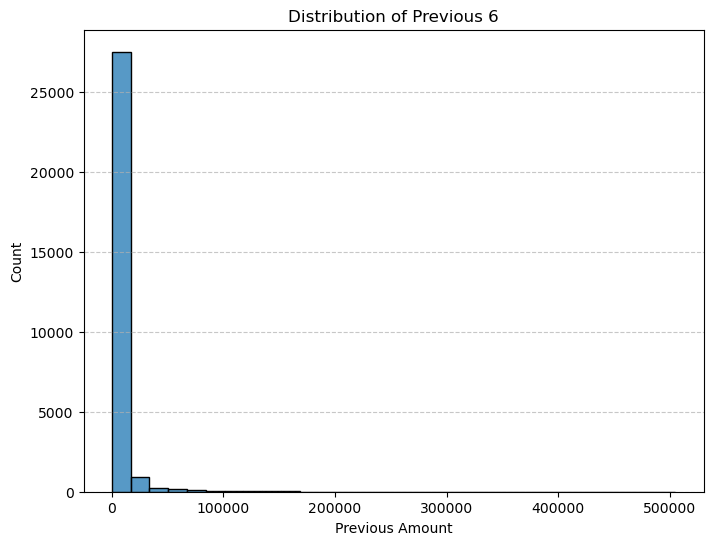

In [5]:
# inpect the data
print("Nullvalues of columns:")
print(df_original.isnull().sum())
print("Datatypes of columns:")
for column in df_original.columns:
    print(f"Column '{column}' has data type: {df_original[column].dtype}")

#rename columns:
df_original.rename(columns=lambda x: x.strip(), inplace=True)


# Analyze Column ID:
df_original = df_original.drop(columns=["ID"])

# Analyze Column Credit:
    #create a plot
plt.figure(figsize=(10, 6))
plt.hist(df_original['Credit'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Credit Amounts')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
    #check for negative credits
negative_credits = df_original[df_original['Credit'] < 0]
if not negative_credits.empty:
    print("Negative values found in the 'Credit' column:")
    print(negative_credits)
else:
    print("No negative values found in the 'Credit' column.")

# Analyze Column Sex:
    #rename column
df_original.rename(columns={'Sex': 'Female'}, inplace=True)
    #recode the column
df_original['Female'] = df_original['Female'].map({1: 0, 2: 1})
    #create a plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Female', data=df_original, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze Column Education:
    #create a plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df_original, palette='pastel')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    #remove ambiguous values
df_original = df_original[~df_original['Education'].isin([0,4, 5, 6])]
    #create a new plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df_original, palette='pastel')
plt.title('Distribution of new Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze Column Status:
    #rename column
df_original.rename(columns={'Status': 'Marital Status'}, inplace=True)
    #create a plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=df_original, palette='pastel')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    #remove ambiguous values
df_original = df_original[~df_original['Marital Status'].isin([0,3])]
    #recode the column
df_original['Marital Status'] = df_original['Marital Status'].map({1: 1, 2: 0})
 #create a new plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', data=df_original, palette='pastel')
plt.title('Distribution of new Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze Column Age:
    #create a plot
plt.figure(figsize=(10, 6))
plt.hist(df_original['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
    #check for negative credits
negative_ages = df_original[df_original['Age'] < 0]
if not negative_ages.empty:
    print("Negative values found in the 'Age' column:")
    print(negative_ages)
else:
    print("No negative values found in the 'Age' column.")
    #check the top 5 values
top_5_ages = df_original['Age'].nlargest(5)
print("The 5 highest values in the 'Age' column are:")
print(top_5_ages)

# Analyze Columns Repayment:
    # Loop through Repayment 1 to Repayment 6 columns
for i in range(1, 7):
    # Create a figure for each repayment column
    plt.figure(figsize=(8, 6))
    sns.countplot(x=f'Repayment {i}', data=df_original, palette='pastel')
    plt.title(f'Distribution of Repayment {i}')
    plt.xlabel('Repayment Status')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Analyze Columns Amount:
    # Loop through Amount 1 to Amount 6 columns
for i in range(1, 7):
    # Create a figure for each Amount column
    plt.figure(figsize=(8, 6))
    sns.histplot(df_original[f'Amount {i}'], bins=30, kde=False, palette='pastel')
    plt.title(f'Distribution of Amount {i}')
    plt.xlabel('Amount')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Analyze Columns Previous:
    # Loop through Previous 1 to Previous 6 columns
for i in range(1, 7):
    # Create a figure for each Previous column
    plt.figure(figsize=(8, 6))
    sns.histplot(df_original[f'Previous {i}'], bins=30, kde=False, palette='pastel')
    plt.title(f'Distribution of Previous {i}')
    plt.xlabel('Previous Amount')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


## 2. Preprocessing

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


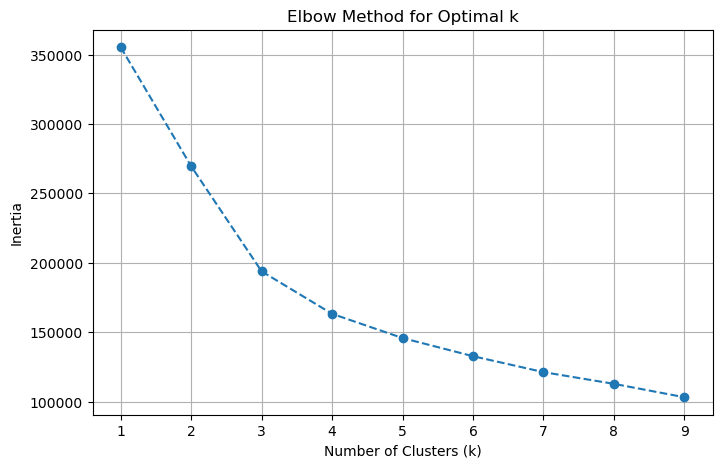

In [7]:
df_cleaned = df_original.copy()

# Calculate the average Account Balance
df_cleaned['Average_Account_Balance'] = df_cleaned[[f'Amount {i}' for i in range(1, 7)]].mean(axis=1)
    #create a plot
# plt.figure(figsize=(10, 6))
# plt.hist(df_cleaned['Average_Account_Balance'], bins=30, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Average_Account_Balance')
# plt.xlabel('Average_Account_Balance')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# Calculate the standard deviation Account Balance
#df_cleaned['Std_Account_Balance'] = df_cleaned[[f'Amount {i}' for i in range(1, 7)]].std(axis=1)

# Average Repayment Amount
df_cleaned['Average_Repayment_Amount'] = df_cleaned[[f'Previous {i}' for i in range(1, 7)]].mean(axis=1)
  #create a plot
# plt.figure(figsize=(10, 6))
# plt.hist(df_cleaned['Average_Repayment_Amount'], bins=30, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Average_Repayment_Amount')
# plt.xlabel('Average_Repayment_Amount')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# Calculate the standard deviation Repayment Amount
#df_cleaned['Std_Repayment_Amount'] = df_cleaned[[f'Previous {i}' for i in range(1, 7)]].std(axis=1)

# Median Repayment Status
df_cleaned['Median_Repayment_Status'] = df_cleaned[[f'Repayment {i}' for i in range(1, 7)]].median(axis=1)
  #create a plot
# plt.figure(figsize=(10, 6))
# plt.hist(df_cleaned['Median_Repayment_Status'], bins=30, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Median_Repayment_Status')
# plt.xlabel('Median_Repayment_Status')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# Calculate the standard deviation Repayment Status
#df_cleaned['Std_Repayment_Status'] = df_cleaned[[f'Repayment {i}' for i in range(1, 7)]].std(axis=1)

# Total Repayments Late
def calculate_total_late_repayments(row):
    return sum(x for x in row if x > 0)
df_cleaned['Total_Repayments_Late'] = df_cleaned[['Repayment 1', 'Repayment 2', 'Repayment 3', 'Repayment 4', 'Repayment 5', 'Repayment 6']].apply(calculate_total_late_repayments, axis=1)
  #create a plot
# plt.figure(figsize=(10, 6))
# plt.hist(df_cleaned['Total_Repayments_Late'], bins=30, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Total_Repayments_Late')
# plt.xlabel('Total_Repayments_Late')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# # Total Repayments ontime
# def calculate_total_ontime_repayments(row):
#     return sum(x for x in row if x <= 0)
# df_cleaned['Total_Repayments_ontime'] = df_cleaned[['Repayment 1', 'Repayment 2', 'Repayment 3', 'Repayment 4', 'Repayment 5', 'Repayment 6']].apply(calculate_total_ontime_repayments, axis=1)
#   #create a plot
# plt.figure(figsize=(10, 6))
# plt.hist(df_cleaned['Total_Repayments_ontime'], bins=30, edgecolor='k', alpha=0.7)
# plt.title('Histogram of Total_Repayments_ontime')
# plt.xlabel('Total_Repayments_ontime')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

# Get dummy cariables
df_cleaned = pd.get_dummies(df_cleaned, columns=['Education','Marital Status','Female'], drop_first=True).astype(int)


# drop columns
original_columns_to_remove = [f'Repayment {i}' for i in range(1, 7)] + \
                             [f'Amount {i}' for i in range(1, 7)] + \
                             [f'Previous {i}' for i in range(1, 7)] #+ \
                            #['Education_2','Education_3','Marital Status_1','Female_1']

# Remove the original columns
df_cleaned.drop(columns=original_columns_to_remove, inplace=True)

# Create a copy for no scaling szenario
df_no_Scaling = df_cleaned.copy()

# scale columns
columns_to_scale = df_cleaned.columns.tolist()

# Initialize the scaler
#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MinMaxScaler()

# Scale the selected columns
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])


# elbow method
inertia_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=20, init='k-means++', n_init=10, algorithm='elkan', max_iter=600)
    kmeans.fit(df_cleaned)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()





## 3. Running the Model

In [9]:
# df_preprocessed = df_cleaned.copy()

# # Define an array of cluster options
# cluster_options = [3]

# # Initial centers: Ensure they have the same number of features as the data
# initial_centroids = [
#     ('First / Last values', np.vstack([df_preprocessed.iloc[0].values, df_preprocessed.iloc[-1].values, df_preprocessed.mean().values])),
#     ('Min / Max values', np.vstack([
#         df_preprocessed.min().values,
#         df_preprocessed.max().values,
#         df_preprocessed.mean().values
#     ]))
# ]

# for name, model in initial_centroids:
#     for num_clusters in cluster_options:
#         # Ensure model has the right number of initial centers
#         if model.shape[0] != num_clusters or model.shape[1] != df_preprocessed.shape[1]:
#             raise ValueError(f"The shape of the initial centers {model.shape} does not match the number of clusters {num_clusters} and features {df_preprocessed.shape[1]}.")

#         # Run KMeans with custom initial centroids
#         kmeans = KMeans(n_clusters=num_clusters, random_state=20, init=model, n_init=1, max_iter=600)
#         df_preprocessed['Cluster'] = kmeans.fit_predict(df_preprocessed)
#         clusters = df_preprocessed['Cluster']

#         # Inspect the cluster assignments
#         print(f'Cluster assignments for {num_clusters} clusters with {name} initialization:')
#         print(df_preprocessed['Cluster'].value_counts())

#         # Silhouette Scores:
#         silhouette_avg = silhouette_score(df_preprocessed.drop(columns=['Cluster']), df_preprocessed['Cluster'])
#         print(f'Silhouette Score: {silhouette_avg}')

#         # Davies-Bouldin Index:
#         db_index = davies_bouldin_score(df_preprocessed.drop(columns=['Cluster']), df_preprocessed['Cluster'])
#         print(f'Davies-Bouldin Index: {db_index}')

Cluster assignments for 3 clusters:
Cluster
2    24436
0     3220
1     1507
Name: count, dtype: int64
Silhouette Score: 0.5183809478593964
Davies-Bouldin Index: 0.8273450410195048


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


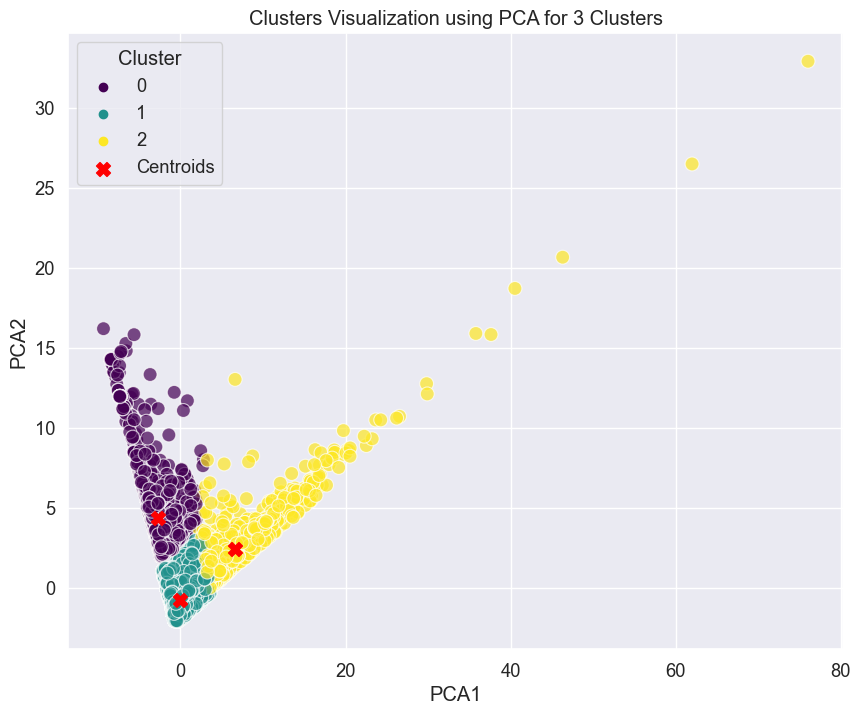

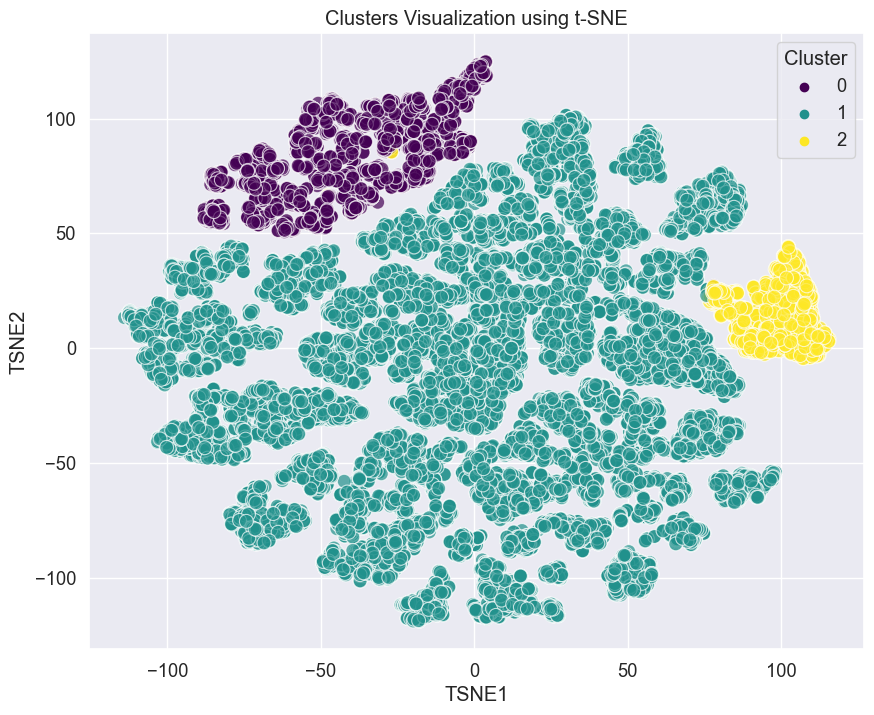

In [97]:
#KMEANS
df_preprocessed = df_cleaned.copy()

# Define an array of cluster options
cluster_options = [3]

for num_clusters in cluster_options:
    # Run KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=20, init='random', n_init=10, algorithm='elkan', max_iter=600)
    df_preprocessed['Cluster'] = kmeans.fit_predict(df_preprocessed)
    clusters = kmeans.fit_predict(df_preprocessed)
    df_no_Scaling['Cluster'] = df_preprocessed['Cluster']

    # Inspect the cluster assignments
    print(f'Cluster assignments for {num_clusters} clusters:')
    print(df_preprocessed['Cluster'].value_counts())

    # Silhouette Scores:
    silhouette_avg = silhouette_score(df_preprocessed[df_preprocessed.columns], df_preprocessed['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')

    # Davies-Bouldin Index:
    db_index = davies_bouldin_score(df_preprocessed[df_preprocessed.columns], df_preprocessed['Cluster'])
    print(f'Davies-Bouldin Index: {db_index}')

    # Perform PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_preprocessed)

     # Transform centroids to PCA space
    centroids = kmeans.cluster_centers_
    centroids_pca = pca.transform(centroids)

    # Create a DataFrame with PCA results
    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = clusters

    # Plot the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=100, marker='X', label='Centroids')
    plt.title(f'Clusters Visualization using PCA for {num_clusters} Clusters')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    #Perform t-SNE to reduce to 2 dimensions
    tsne = TSNE(n_components=2, random_state=42)
    df_tsne = tsne.fit_transform(df_preprocessed)

    # Create a DataFrame with t-SNE results
    df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'])
    df_tsne['Cluster'] = clusters

    # Plot the clusters using t-SNE
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=df_tsne, s=100, alpha=0.7)
    plt.title('Clusters Visualization using t-SNE')
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()



In [1]:
#DBSCAN
df_preprocessed = df_cleaned.copy()

# Define the range of values for eps and min_samples
eps_values = [0.3, 0.5, 0.7, 0.9]
min_samples_values = [3, 5, 7, 9]

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

# Initialize a list to store the results
results = []

# # Iterate over the range of values for eps and min_samples
# for eps in eps_values:
#     for min_samples in min_samples_values:
#         # Run DBSCAN
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         clusters = dbscan.fit_predict(df_pca)
        
#         # Check if there are more than one cluster (excluding noise)
#         if len(set(clusters)) > 1:
#             # Calculate the Silhouette Score
#             silhouette_avg_dbscan = silhouette_score(df_pca, clusters)
#             # Calculate the Davies-Bouldin Index
#             db_index_dbscan = davies_bouldin_score(df_pca, clusters)
#             results.append((eps, min_samples, silhouette_avg_dbscan, db_index_dbscan))
#             print(f'DBSCAN with eps={eps}, min_samples={min_samples} - Silhouette Score: {silhouette_avg_dbscan}, Davies-Bouldin Index: {db_index_dbscan}')
#         else:
#             results.append((eps, min_samples, None, None))
#             print(f'DBSCAN with eps={eps}, min_samples={min_samples} - Silhouette Score: Not applicable (only one cluster)')

# # Store the results in a DataFrame for better visualization
# results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score', 'davies_bouldin_index'])
# print(results_df)

# Example: Run the best DBSCAN (e.g., eps=0.5, min_samples=5) on the PCA-transformed data
best_eps = 0.7
best_min_samples = 9
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(df_pca)

# Add the cluster labels to the original DataFrame
df_preprocessed['Cluster'] = clusters
df_no_Scaling['Cluster'] = clusters

# Inspect the cluster assignments
print(f'Cluster assignments for DBSCAN with eps={best_eps}, min_samples={best_min_samples}:')
print(df_preprocessed['Cluster'].value_counts())

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7)
plt.title(f'Clusters Visualization using PCA for DBSCAN with eps={best_eps}, min_samples={best_min_samples}')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

NameError: name 'df_cleaned' is not defined

Cluster assignments for 3 clusters:
Cluster
0    25479
1     3201
2      483
Name: count, dtype: int64
Silhouette Score: 0.4908431891375978
Davies-Bouldin Index: 0.761773027228832


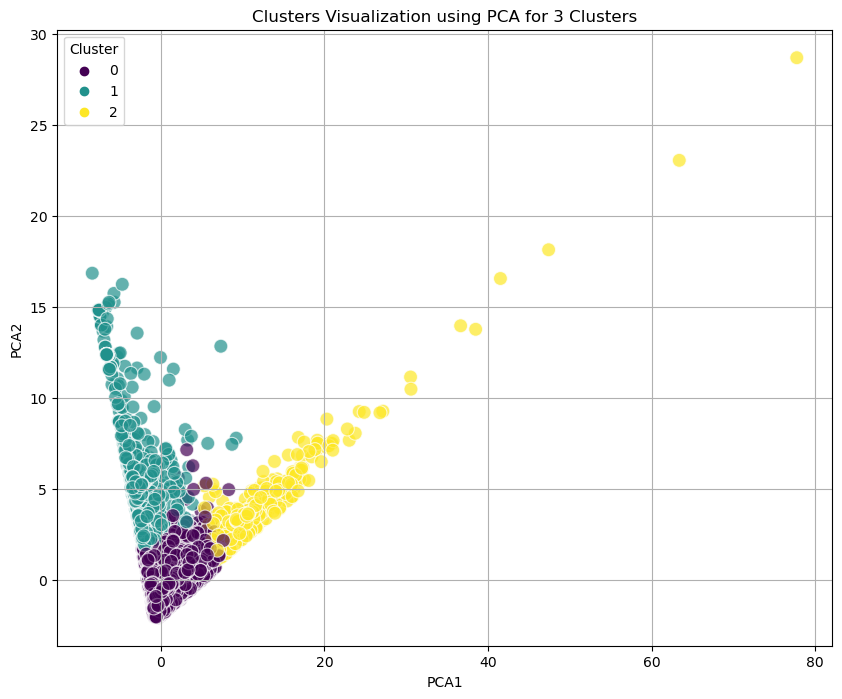

In [13]:
#Agglomerative Clustering
df_preprocessed = df_cleaned.copy()

cluster_options_2 = [3]
for num_clusters in cluster_options_2:
    # Run Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    df_preprocessed['Cluster'] = agglomerative.fit_predict(df_preprocessed)
    clusters = agglomerative.fit_predict(df_preprocessed)
    df_no_Scaling['Cluster'] = df_preprocessed['Cluster']

    # Inspect the cluster assignments
    print(f'Cluster assignments for {num_clusters} clusters:')
    print(df_preprocessed['Cluster'].value_counts())

    # Silhouette Scores:
    silhouette_avg = silhouette_score(df_preprocessed, df_preprocessed['Cluster'])
    print(f'Silhouette Score: {silhouette_avg}')

    # Davies-Bouldin Index:
    db_index = davies_bouldin_score(df_preprocessed[df_preprocessed.columns], df_preprocessed['Cluster'])
    print(f'Davies-Bouldin Index: {db_index}')

    # Perform PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_preprocessed)

    # Create a DataFrame with PCA results
    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = clusters

    # Plot the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7)
    plt.title(f'Clusters Visualization using PCA for {num_clusters} Clusters')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

## 4. Plotting the Results

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

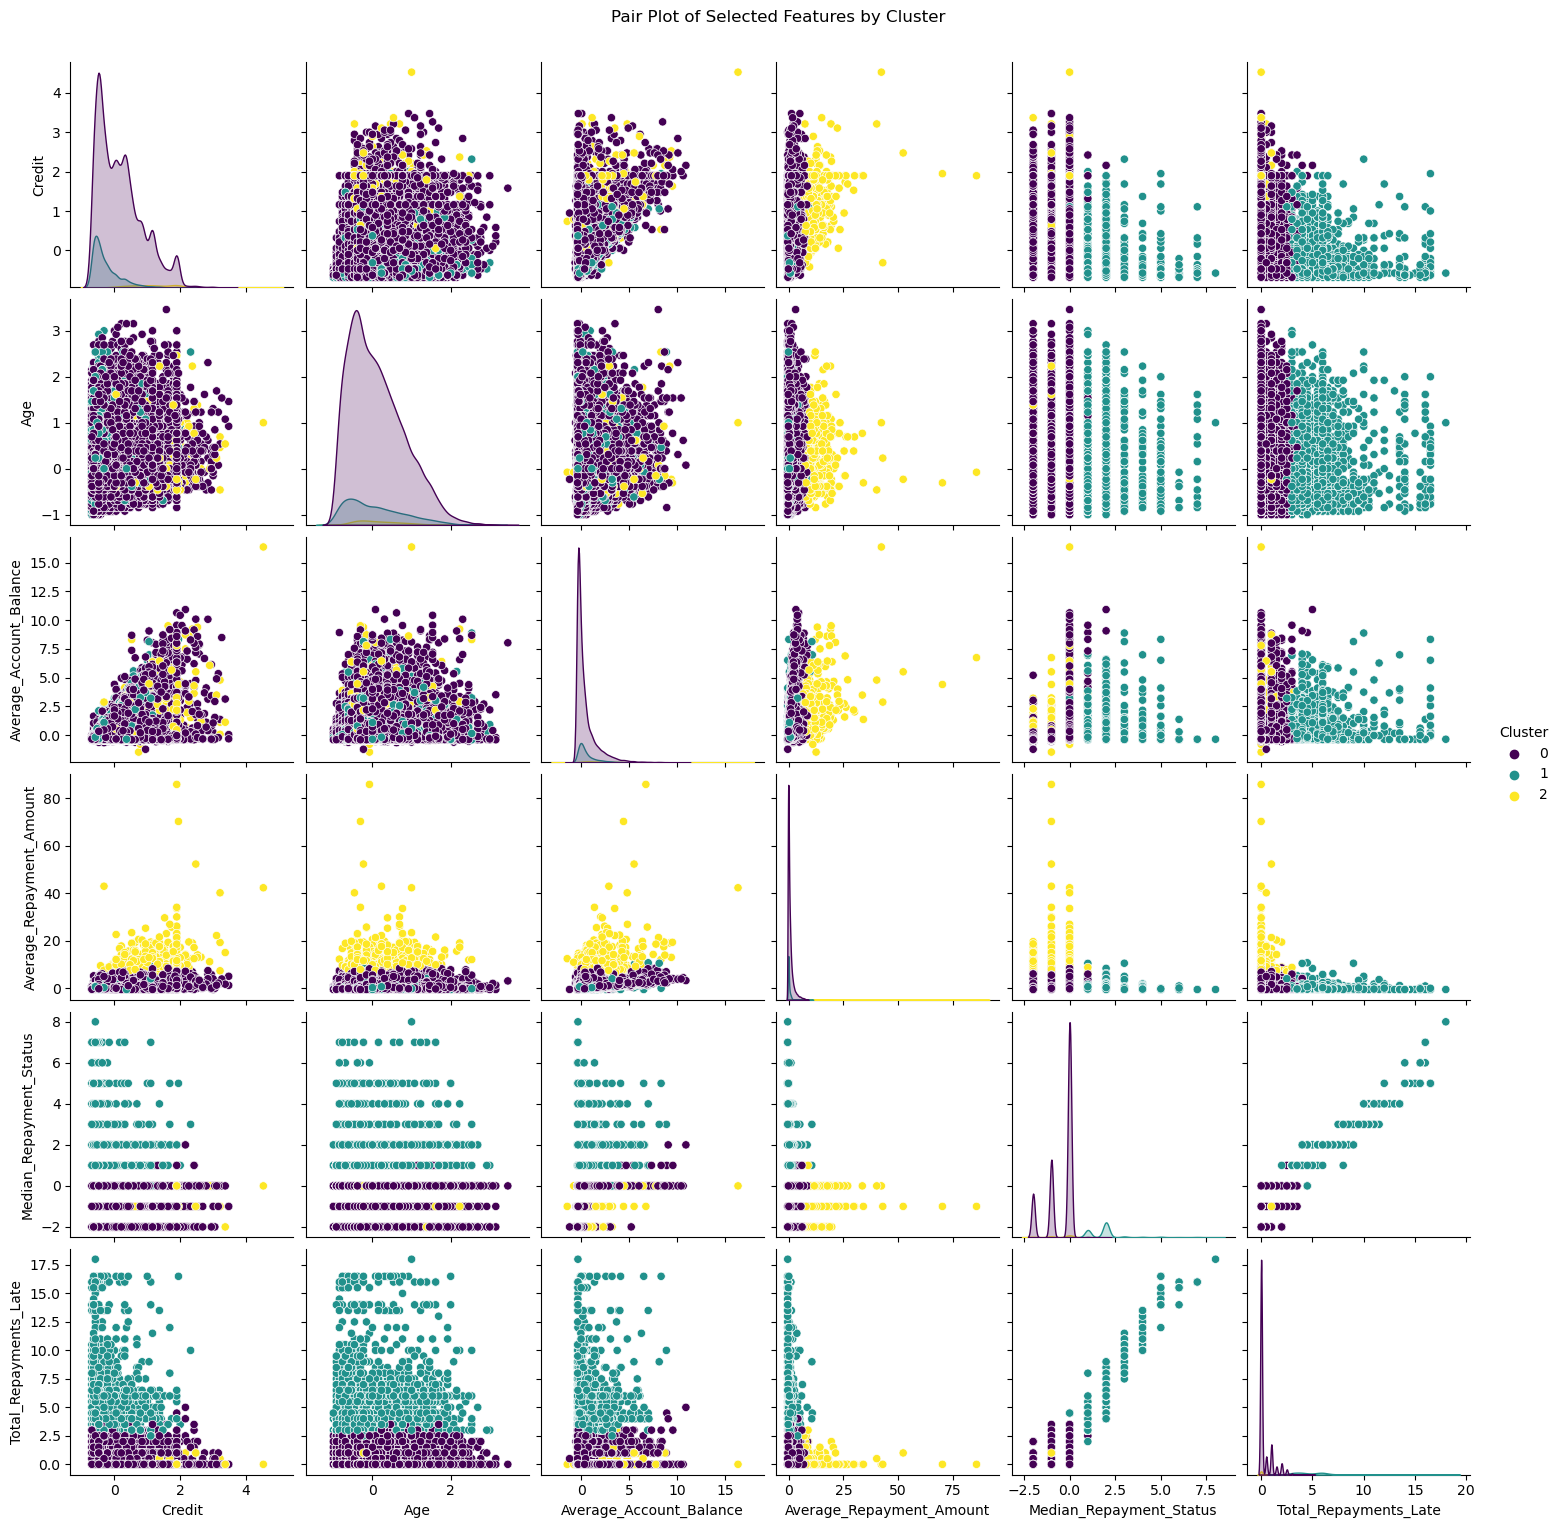

In [14]:
# Pair plot of selected features
#Please note that this plots the most recently run model
selected_features = df_preprocessed.columns.drop(['Cluster','Education_2','Education_3','Marital Status_1','Female_1']).tolist()
#selected_features = df_preprocessed.columns.drop(['Cluster']).tolist()
sns.pairplot(df_preprocessed[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()


## 5. Model Diagnostics

           Credit   Age  Average_Account_Balance  Average_Repayment_Amount  \
Cluster                                                                      
0        150000.0  34.0                  18838.0                    2500.0   
1         60000.0  33.0                  30158.0                    1583.0   
2        360000.0  35.0                 106433.0                   47954.0   

         Median_Repayment_Status  Total_Repayments_Late  Education_2  \
Cluster                                                                
0                            0.0                    0.0          0.0   
1                            2.0                   10.0          1.0   
2                            0.0                    0.0          0.0   

         Education_3  Marital Status_1  Female_1  
Cluster                                           
0                0.0               0.0       1.0  
1                0.0               0.0       1.0  
2                0.0               0.0      

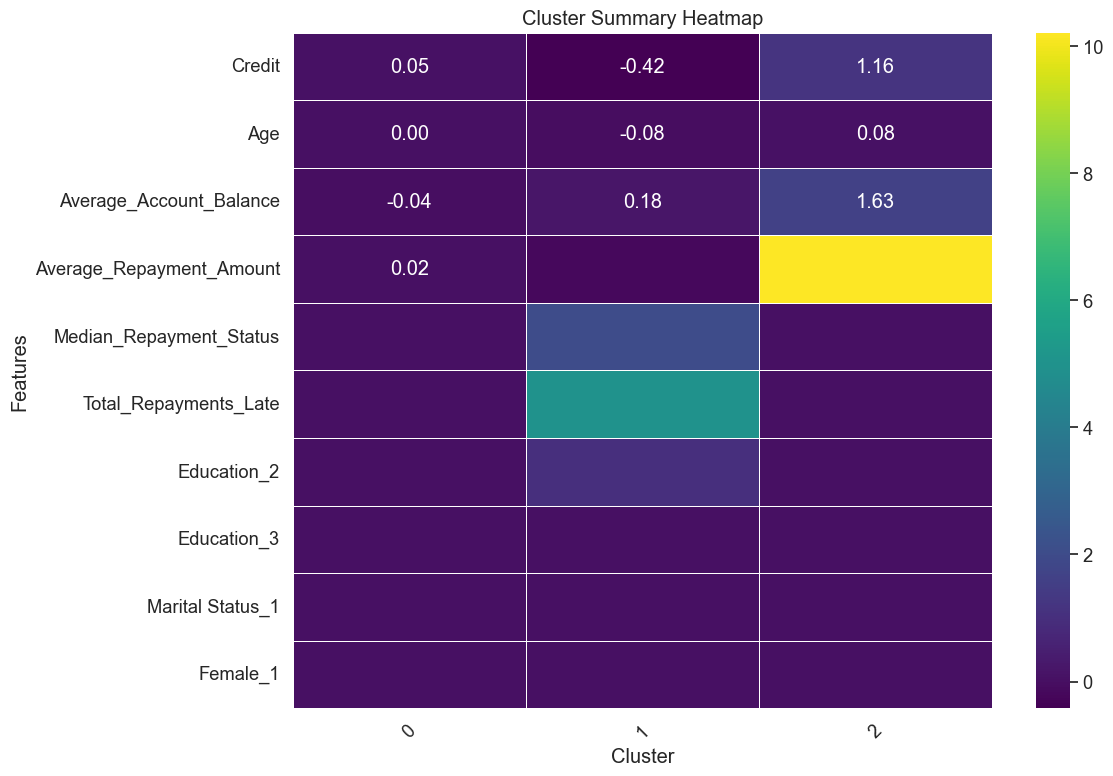

In [15]:
#Please note that this sums up the most recently run model

cluster_summary = df_no_Scaling.groupby('Cluster').median()
print(cluster_summary)

# Compute the cluster summary
cluster_summary = df_preprocessed.groupby('Cluster').median()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cluster_summary.T, cmap="viridis", annot=True, fmt=".2f", linewidths=.5)

# Improve the aesthetics
plt.title('Cluster Summary Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save and display the plot
plt.show()